# Анализ статьи [On the convergence of Single-Call Stochastic Extra-Gradient Methods](https://arxiv.org/abs/1908.08465)

**Latex preset**
$\require{amsmath}$

$\newcommand{\eps}{\varepsilon}$
$\newcommand{\bfone}{\mathbf{1}}$
$\newcommand{\E}{\mathbb{E}}$
$\newcommand{\N}{\mathbb{N}}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\bS}{\mathbb{S}}$
$\newcommand{\cC}{\mathcal{C}}$
$\newcommand{\cE}{\mathcal{E}}$
$\newcommand{\cF}{\mathcal{F}}$
$\newcommand{\cL}{\mathcal{L}}$
$\newcommand{\cX}{\mathcal{X}}$
$\newcommand{\wdh}{\widehat}$
$\newcommand{\wdt}{\widetilde}$
$\newcommand{\vdelta}{\partial}$
$\newcommand{\pd}[2]{\frac{\vdelta #1}{\vdelta #2}}$
$\newcommand{\lsi}[1]{\left[#1\right)}$
$\newcommand{\rsi}[1]{\left(#1\right]}$
$\newcommand{\set}[1]{\left\{#1\right\}}$
$\newcommand{\range}[2]{\set{#1, \ldots, #2}}$
$\newcommand{\such}{\ \big|\ }$
$\let\bs\backslash$
$\let\ra\rightarrow$
$\let\Ra\Rightarrow$
$\let\Lora\Longrightarrow$
$\let\Lra\Leftrightarrow$
$\let\la\leftarrow$
$\let\La\Leftarrow$
$\let\Lola\Longleftarrow$
$\let\Lolra\Longleftrightarrow$
$\let\ole\overline$
$\newcommand{\floor}[1]{\left\lfloor#1\right\rfloor}$
$\newcommand{\ceil}[1]{\left\lceil#1\right\rceil}$
$\newcommand{\ps}[1]{\left(#1\right)}$
$\newcommand{\md}[1]{\left|#1\right|}$
$\newcommand{\nm}[1]{\left\|#1\right\|}$
$\newcommand{\tbr}[1]{\left\langle#1\right\rangle}$
$\newcommand{\set}[1]{\left\{#1\right\}}$
$\newcommand{\System}[1]{\left\{\begin{aligned}#1\end{aligned}\right.}$
$\DeclareMathOperator{\tr}{tr}$
$\DeclareMathOperator{\cl}{cl}$
$\DeclareMathOperator{\rk}{rk}$
$\DeclareMathOperator{\Int}{int}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\Err}{Err}$

## Причины статьи

Машинное обучение (в частности GANы) нуждается в методах для решения вариациационных неравенств, которые бы требовали как можно меньше вызовов оракула (вычисление градиента, поиск проекции). Базовые методы требуют 2 вызова и градиента, и проекции за 1 итерацию.

Очень часто в таких задачах либо нет ограничений на решения, либо они крайне незначительны и их можно простыми способами обойти, поэтому проекция не страшна. Вся борьба ведётся за вычисление градиента.

## Основные определения

### Стохастический анализ

Пусть $(\Omega, \cF, P)$ - вероятностной пространство, $(E, \cE)$ - измеримое пространство. Тогда множество случайных величин $\{X_t\}_{t = 1}^\infty$, $X_t \colon \Omega \to E$ называется *стохастическим (случайным) процессом*.

В силу исторических причин, $t$ соотносится обычно со временем.

**Определение:** пусть $T \colon \cX \to \cX$ - отображение, сохраняющее вероятностную меру, $f \in L_1(P)$ (то есть $f$ интегрируема по Лебегу по мере $P$), $x \in \cX$ Тогда *эргодическим средним* или же *средним по времени* называется следующая точка, если она существует:
$$
    \hat{f}(x) = \lim_{n \to \infty} \frac{1}{n} \sum_{k = 0}^{n - 1} f(T^k(x))
$$
где $T^k$ соответствует композиции $k$ раз.

**В контексте алгоритмов:** $x = x_0$ - стартовая точка метода оптимизации. За $T$ можно считать 1 итерацию алгоритма, а $f$ нас обычно интересует лишь вида $f = id$.

**Замечание:** мы также будем называть эргодическим средним выражение, стоящее под знаком предела.

### Оптимизация

Далее везде мы живём в пространстве $\R^d$, если не сказано явно иного. Также мы закрепляем следующие обозначения:

- $\cX \subseteq \R^d$ за непустым замкнутым выпуклым подмножеством точек
- $V \colon \R^d \to \R^d$ - некоторый оператор на нашем пространстве, чьи свойства мы будем уточнять по мере необходимости.

**Определение:** *седловой точкой* дифференцируемой функции $f \colon \R^d \to \R^n$ называется критическая точка $f$, которая не является ни локальным минимумом, ни локальным максимумом $f$.

**Определение:** Пусть $\cX = \Theta \times \Phi$, где $\Theta \subseteq \R^{d_1}$ и $\Phi \subseteq \R^{d_2}$. $\cL(\theta, \phi)$ - дифференцируемая функция двух переменных с липшицевым градиентом. Тогда *min-max задачей* называется следующая задача оптимизации:
$$
    \min_{\theta \in \R^{d_1}} \max_{\phi \in \R^{d_2}} \cL(\theta, \phi), \text{ s.t. } \theta \in \Theta \wedge \phi \in \Phi
$$

**Определение:** в min-max задаче, где $\cL$ является выпукло-вогнутой функцией, имеет место *функция ошибки Никаидо-Исоды*:
$$
    NI(\wdh{x}) := \sup_{\phi \in \Phi} \cL(\wdh{\theta}, \phi) - \inf_{\theta \in \Theta} \cL(\theta, \wdh{\phi})
$$
И также есть ограниченный вариант:
$$
    NI_R(\wdh{x}) := \max_{\phi \in \Phi_R} \cL(\wdh{\theta}, \phi) - \min_{\theta \in \Theta_R} \cL(\theta, \wdh{\phi})
$$
где $\Phi_R = \{\phi \in \Phi \colon \|\phi\| \le R\}$, $\Theta_R = \{\theta \in \Theta \colon \|\theta\| \le R\}$

**Определение:** оператор $V$ называется *монотонным*, если выполнено следующее условие:
$$
    \forall x, x' \in \R^d\ \ \tbr{V(x') - V(x), x' - x} \ge 0
$$

**Интуиция:** вектор изменения значений $V$ сонаправлен с осью, задаваемой вектором $x' - x$. Для случая $V = \nabla f$, где $f$ некоторая *достаточно гладкая* функция, выполнение условия эквивалентно тому, что $f$ выпукла

**Определение:** оператор $V$ называется *$\alpha$-строго монотонным*, если выполнено следующее условие:
$$
    \exists \alpha > 0 \such \forall x, x' \in \R^d\ \ \tbr{V(x') - V(x), x' - x} \ge \alpha\|x' - x\|^2
$$

## Основные цели
- Обобщить уже имеющиеся результаты про 1-EG методы
- Показать, что детерминированные 1-EG методы сохраняют оптимальный порядок сходимости $O(1 / t)$ в случае монотонного вариационного неравенства с липшицевостью.
- Показать, что стохастические 1-EG методы сохраняют оптимальный порядок $O(1 / t)$ локальной сходимости (для последней итерации) в случае немонотонного вариационного неравенства

<img src="assets/ArticleResults.png" width="600" height="600">

Обведённые результаты - то, что было получено в статье.

**Замечание:** зачем изучать и эргодическую точку, и точку последней итерации алгоритма? Потому что первое хорошо работает в монотонном случае, а второе, соответственно, в немонотонном случае (когда, например, неприменимо неравенство Йенсена)

## Постановка задачи

**Определение:** *вариационным неравенством (variational inequality, или просто VI)* называется задача поиска такого $x^* \in \cX$, что выполнено неравенство:
$$
    \exists x^* \in \cX \such \forall x \in \cX\ \ \tbr{V(x^*), x - x^*} \ge 0
$$

**Интуиция к определению:** мы уже сталкивались с похожим неравенством, когда говорили о задаче минимизации выпуклой дифференцируемой функции $f$ на некотором выпуклом множестве $\cX$. Тогда получалось, что $x^*$ - искомый минимум тогда и только тогда, когда выполнено неравенство:
$$
    \forall x \in \cX \tbr{\nabla f(x^*), x - x^*} \ge 0
$$
По сути это означает, что множество $\cX$ лежит по одну сторону от гиперплоскости, которая задаётся своей точкой $x^*$ и нормалью $\nabla f(x^*)$

<img src="assets/FullConvexTheorem.png" width="400" height="400">

**Примеры:**

1. Задача минимизации. Если $f$ - гладкая функция потерь на $\cX = \R^d$, то при $V = \nabla f$ точка $x^*$ является решением вариационного неравенства тогда и только тогда, когда $\nabla f(x^*) = 0$.

2. Min-max оптимизация. Пусть $\cX = \Theta \times \Phi$, $\Theta = \R^{d_1}$ и $\Phi = \R^{d_2}$ и задана гладкая функция $L(\theta, \phi)$. Тогда задачу min-max оптимизации можно переписать в виде вариационного неравенства, используя $V(x) = (\nabla_\theta \cL(x), -\nabla_\phi \cL(x))$

**Определение:** *функцией ошибки* для потенциального решения $\wdh{x} \in \cX$ вариационного неравенства мы назовём следующую функцию:
$$
    \Err(\wdh{x}) = \sup_{x \in \cX} \tbr{V(x), \wdh{x} - x}
$$
и её *ограниченный* вариант:
$$
    \Err_R(\wdh{x}) = \max_{x \in \cX_R} \tbr{V(x), \wdh{x} - x}
$$
где $\cX_R = \cX \cap \ole{B}_R(0) = \{x \in \cX \colon \|x\| \le R\}$

**Интуиция:** самая простая функция ошибки. Ровно говорит нам о том, насколько мы близко/далеко с желаемым неравенством с нулём.

**Определение:** будем говорить, что решение вариационного неравенства $x^* \in \cX$ является *регулярным*, если выполнены условия:
1. Оператор $V$ является $C^1$-гладким в окрестности $x^*$
2. Якобиан $J_V(x^*)$ является положительно определённым относительно всех касательных направлений к $\cX$ в точке $x^*$ (множество таких направлений обозначил за $Z_{\cX, x^*}$):
$$
    \forall z \in Z_{\cX, x^*} \bs \{0\}\ \ z^TJ_V(x^*)z = \sum_{i = 1}^d \sum_{j = 1}^d z_i \pd{V_i}{x_j}(x^*)z_j > 0
$$

**Интуиция:** эти условия соотносятся с требованиями на гессиан, если мы рассматриваем задачу $V = \nabla f$

**Лемма (Нестеров, 2007):** пусть $V$ монотонна. Тогда $x^* \in \cX$ является решением вариационного неравенства тогда и только тогда, когда $\Err(x^*) = 0$.

Более того, так как $\Err(x^*) = 0$ влечёт за собой $\Err_R(x^*) = 0$ для достаточно большого $R > 0$, то наличие условия $\Err_R(x^*) = 0$ также является достаточным для того, чтобы $x^* \in \cX_R$ было решением.

## Теоретическая часть

**Допущение:** Далее мы столкнёмся с изучением *стохастических (случайных) алгоритмов*. Все они будут генерировать последовательности точек $X_t$ из пространства $\cX$ (говоря явно, $X_t \colon \Omega \to \cX$, где $\Omega$ относится к множеству исходов вероятностного пространства). Случайность возникает из-за использования *стохастического оракула*, чьё поведение мы моделируем так:
$$
    V_t = V(X_t) + Z_t
$$
где $Z_t \in \R^d$ - случайный шум. Если $\cF_t$ - это натуральная фильтрация $X_t$, то мы допускаем следующие условия:
1. $\forall t\ \ \E(Z_t | \cF_t) = 0$

2. $\forall t\ \ \E(\|Z_t\|^2| \cF_t) \le \sigma^2$

Понятно, что если $\sigma^2 = 0$, то случайный процесс вырождается в детерминированный, всегда верно равенство $V_t = V(X_t)$. Далее мы будем использовать переменные случайных точек, но алгоритмы, описанные таким образом, естественно можно рассматривать как детерминированные.

### Алгоритмы

**Экстра-градиентный спуск (Extra-Gradient algorithm):** (t + 1)-итерация для EG-алгоритма записывается следующим образом:
$$
    \begin{aligned}
        &{X_{t + 1 / 2} = \Pi_\cX(X_t - \gamma_tV_t)}
        \\
        &{X_{t + 1} = \Pi_\cX(X_t - \gamma_tV_{t + 1 / 2})}
    \end{aligned}
$$
где 
- $\Pi_\cX$ - обыкновенная евклидова проекция на $\cX$: $\Pi_\cX(y) := \arg \min_{x \in \cX} \|y - x\|$
- $\gamma_t > 0$ - произвольно выбранный шаг итерации

**Замечание:** отличие от обычного градиентного спуска состоит в том, что здесь мы находим *промежуточную точку (её ещё называют ведущей)* $X_{t + 1 / 2}$, а затем по информации в ней строим следующую *базовую точку* $X_t$, используя при этом один и тот же шаг $\gamma_t$. В своей идее экстраградиентный метод крайне напоминает метод Нестерова.

**Экстра-градиентный спуск с одним вызовом (оракула):** существуют разные способы убрать градиент из итерации. Так, в статье рассмотрены следующие 3 (они используют либо предыдущий, уже посчитанный градиент, либо аппроксимируют его через разность уже имеющихся $X_t$):
1. Экстра-градиентный спуск по прошлому оракулу (Past Extra-Gradient, PEG):
    $$
        \begin{aligned}
            &{X_{t + 1 / 2} = \Pi_\cX(X_t - \gamma_tV_{t - 1 / 2})}
            \\
            &{X_{t + 1} = \Pi_\cX(X_t - \gamma_tV_{t + 1 / 2})}
        \end{aligned}
    $$
    
    **Идея:** используем $V_{t - 1 / 2}$ вместо того, чтобы считать $V_t$ при вычислении $X_{t + 1 / 2}$

2. Отражённый градиентный спуск (Reflected Gradient, RG):
    $$
        \begin{aligned}
            &{X_{t + 1 / 2} = X_t - (X_{t - 1} - X_t)}
            \\
            &{X_{t + 1} = \Pi_\cX(X_t - \gamma_tV_{t + 1 / 2})}
        \end{aligned}
    $$
    
    **Идея:** используем $\frac{X_{t - 1} - X_t}{\gamma_t}$ вместо $V_t$ и отказываемся от проекции при вычислении $X_{t + 1 / 2}$

3. Оптимистичный градиентный спуск (Optimistic Gradient, OG):
    $$
        \begin{aligned}
            &{X_{t + 1 / 2} = \Pi_\cX(X_t - \gamma_tV_{t - 1 / 2})}
            \\
            &{X_{t + 1} = X_{t + 1 / 2} + \gamma_tV_{t - 1 / 2} - \gamma_tV_{t + 1 / 2}}
        \end{aligned}
    $$
    
    **Идея:** используем $V_{t - 1 / 2}$ вместо $V_t$ при вычислении $X_{t + 1 / 2}$. Используем $X_{t + 1 / 2} + \gamma_tV_{t - 1 / 2}$ вместо $X_t$ и отказываемся от проекции при вычислении $X_{t + 1}$
    
Далее, чтобы говорить об этих методах сразу, мы будем называть их *1-EG методами* или *1-EG алгоритмами*

**Утверждение:** если все 1-EG детерминированные методы имеют одинаковые стартовые значения $X_0 = X_1 \in \cX$, $V_{1 / 2} = 0$ и запускаются с постоянным шагом $\gamma_t = \gamma$, то в случае $\cX = \R^d$ точки $X_t$ на каждой итерации у всех 1-EG совпадают.

**Доказательство:** индукция по $t$. Отметим, что коль скоро $\cX = \R^d$, то оператор проекции является просто тождественным, его можно не писать:
- База индукции $t \le 2$:
    - PEG:
    $$
        \begin{aligned}
            &{X_{3 / 2} = X_1 - \gamma V_{1 / 2} = X_0}
            \\
            &{X_2 = X_1 - \gamma V_{3 / 2}}
        \end{aligned}
    $$
    - RG:
    $$
        \begin{aligned}
            &{X_{3 / 2} = X_1 - (X_0 - X_1) = X_1 = X_0}
            \\
            &{X_2 = X_1 - \gamma V_{3 / 2}}
        \end{aligned}
    $$
    - OG:
    $$
        \begin{aligned}
            &{X_{3 / 2} = X_1 - \gamma V_{1 / 2} = X_0}
            \\
            &{X_2 = X_{3 / 2} + \gamma V_{1 / 2} - \gamma V_{3 / 2} = X_1 - \gamma V_{3 / 2}}
        \end{aligned}
    $$
- Переход $t > 2$: покажем, что правила приводятся к одинаковому виду, тем самым точки получатся одинаковые.
    - PEG:
      $$
          \begin{aligned}
              &{X_{t + 1 / 2} = X_t - \gamma V_{t - 1 / 2}}
              \\
              &{X_{t + 1} = X_t - \gamma V_{t + 1 / 2}}
          \end{aligned}
      $$
    - RG:
      $$
          \begin{aligned}
              &{X_{t + 1 / 2} = X_t - (X_{t - 1} - X_t)}
              \\
              &{X_{t + 1} = X_t - \gamma V_{t + 1 / 2}}
          \end{aligned}
      $$
      Преобразуем первое правило. Для этого распишем $X_t$ через второе правило:
      $$
          X_t = X_{t - 1} - \gamma V_{t - 1 + 1 / 2} = X_{t - 1} - \gamma V_{t - 1 / 2} \Lora X_{t - 1} - X_t = \gamma V_{t - 1 / 2}
      $$
      Подстановка тривиально делает первое правило RG таким же, как и у PEG'а
    - OG:
      $$
          \begin{aligned}
              &{X_{t + 1 / 2} = X_t - \gamma V_{t - 1 / 2} \Lora X_{t + 1 / 2} + \gamma V_{t - 1 / 2} = X_t}
              \\
              &{X_{t + 1} = X_{t + 1 / 2} + \gamma V_{t - 1 / 2} - \gamma V_{t + 1 / 2} \Lora X_{t + 1} = X_t - \gamma V_{t + 1 / 2}}
          \end{aligned}
      $$

### Технические леммы

**Замечание:** дальше будет довольно удобно использовать нотацию для подстановки переменных. Так, выражение $(x_1, \ldots, x_n) \la (y_1, \ldots, y_n)$ означает подстановку вместо переменных $x_1, \ldots, x_n$ переменные $y_1, \ldots, y_n$.

**Техлемма 0:** имеет место так называемое *неравенство Юнга*:
$$
    \forall x, y \in \R^d\ \ 2\tbr{x, y} \le \|x\|^2 + \|y\|^2
$$

**Доказательство:** заметим, что если перенести всё направо, то получим $\|x - y\|^2 \ge 0$

**Следствие:** верно неравенство $\forall x, y \in \R^d\ \ \|x + y\|^2 \le 2\|x\|^2 + 2\|y\|^2$

**Техлемма 1:** пусть $x, y \in \R^d$ и $\cC \subseteq \R^d$ - замкнутое выпуклое множество. Определим $x^+ := \Pi_\cC(x - y)$. Тогда верно следующее неравенство:
$$
    \forall p \in \cC\ \ \|x^+ - p\|^2 \le \|x - p\|^2 - 2\tbr{y, x^+ - p} - \|x^+ - x\|^2
$$

**Доказательство:** распишем величину слева в неравенстве:
$$
    \begin{aligned}
        &\|x^+ - p\|^2 = \|x^+ - x + x - p\|^2 =
        \\
        &\|x - p\|^2 + 2\tbr{x^+ - x, x - p} + \|x^+ - x\|^2 =
        \\
        &\|x - p\|^2 + 2\tbr{x^+ - x, x^+ - p} + \|x^+ - x\|^2
    \end{aligned}
$$
Проекция, как известно, обладает хорошим свойством на скалярное произведение: $\tbr{x^+ - (x - y), x^+ - p} \le 0$. Из этого неравенства выражаем то скалярное произведение, что наисано выше и тривиально получаем требуемое.

**Техлемма 2:** пусть $x, y_1, y_2 \in \R^d$ и $\cC_1, \cC_2 \subseteq \R^d$ - замкнутые выпуклые множества. Определим $x_i^+ := \Pi_{\cC_i}(x - y_i)$. Имеет место два факта:

1. Если $\cC_2 = \R^d$, то
   $$
       \forall p \in \R^d\ \ \|x_2^+ - p\|^2 = \|x - p\|^2 - 2\tbr{y_2, x_1^+ - p} + \|x_2^+ - x_1^+\|^2 - \|x_1^+ - x\|^2
   $$
   
2. Если $\cC_2 \subseteq \cC_1$, то
   $$
       \begin{aligned}
           \forall p \in \cC_2\ \ \|x_2^+ - p\|^2 &\le \|x - p\|^2 - 2\tbr{y_2, x_1^+ - p} + 2\tbr{y_2 - y_1, x_1^+ - x_2^+} - \|x_2^+ - x_1^+\|^2 - \|x_1^+ - x\|^2
           \\
           &\le \|x - p\|^2 - 2\tbr{y_2, x_1^+ - p} + \|y_2 - y_1\|^2 - \|x_1^+ - x\|^2
       \end{aligned}
   $$

**Доказательство:**

1. Воспользуемся той же схемой доказательства, что и в Техлемме 1: просто распишем левую часть:

   $$
       \begin{aligned}
           \|x_2^+ - p\|^2 &= \|x_2^+ - x_1^+ + x_1^+ - x + x - p\|^2
           \\
           &[\text{через скал. произв.}]= \|x_2^+ - x_1^+\|^2 + \|x_1^+ - x\|^2 + \|x - p\|^2 + 2\tbr{x_2^+ - x_1^+, x_1^+ - p} + 2\tbr{x^+ - x, x - p}
           \\
           &[\text{переход к проекции в конце}]= \|x_2^+ - x_1^+\|^2 - \|x_1^+ - x\|^2 + \|x - p\|^2 + 2\tbr{x_2^+ - x_1^+, x_1^+ - p} + 2\tbr{x_1^+ - x, x_1^+ - p}
           \\
           &= \|x - p\|^2 - 2\tbr{y_2, x_1^+ - p} + \|x_2^+ - x_1^+\|^2 - \|x_1^+ - x\|^2
       \end{aligned}
   $$
   
   Равенство в 4й строке достигнуто за счёт того, что мы воспользовались преобразованием:
   
   $$
       \tbr{x^+ - x, x - p} = \tbr{x^+ - x, x - x^+ + x^+ - p} = \tbr{x^+ - x, x^+ - p} - \|x^+ - x\|^2
   $$
   
   А последнее равенство достигнуто при помощи $x_2^+ - x = -y_2$, коль скоро $\cC_2 = \R^d$
   
2. За счёт вложенности множеств, имеем $x_2^+ \in \cC_2 \subseteq \cC_1$. Значит, мы можем воспользоваться результатом Техлеммы 1 с подстановкой $(x, y, x^+, p, \cC) \la (x, y_1, x_1^+, x_2^+ \cC_1)$. Вместе с другой подстановкой $(x, y, x^+, p, \cC) \la (x, y_2, x_2^+, p, \cC_2)$ вначале это даёт 2 неравенства:

   $$
       \begin{aligned}
           \|x_1^+ - x_2^+\|^2 &\le \|x - x_2^+\|^2 - 2\tbr{y_1, x_1^+ - x_2^+} - \|x_1^+ - x\|^2
           \\
           \|x_2^+ - p\|^2 &\le \|x - p\|^2 - 2\tbr{y_2, x_2^+ - p} - \|x_2^+ - x\|^2
       \end{aligned}
   $$
   
   Если их сложить и перенести $\|x_1^+ - x_2^+\|^2$ в правую часть, то мы получаем в первое из неравенств пункта (по модулю того, что скалярные произведения нужно перегруппировать). Чтобы из него получить второе, нужно воспользоваться простеньким неравенством из неотрицательности нормы $\|y_2 - y_1 + x_1^+ - x_2^+\|^2 \ge 0$:
   
   $$
       2\tbr{y_2 - y_1, x_1^+ - x_2^+} \le \|y_2 - y_1\|^2 + \|x_1^+ - x_2^+\|^2
   $$

**Техлемма 3:** пусть $\{a_t\}_{t = 1}^\infty \subset \R$ и $b, t_0 \in \N$ таковы, что выполнено рекурсивное неравенство:
$$
    \exists q > 1, q' > 0 \such \forall t \ge t_0\; a_{t + 1} \le \ps{1 - \frac{q}{t + b}}a_t + \frac{q'}{(t + b)^2}
$$
Тогда рекурсивное неравенство можно развернуть в следующее:
$$
    a_t \le \frac{q'}{q - 1} \cdot \frac{1}{t} + o\ps{\frac{1}{t}}
$$

**Доказательство:** для начала покажем, что мы можем к изучению такой $a'_t \le a_t$, что выполнено то же неравенство из условия, но без крайнего слагаемого:
$$
    \forall t \ge t_0\; a'_{t + 1} \le \ps{1 - \frac{q}{t + b}}a'_t
$$
**Далее идёт слишком синтетическое утверждение, посему доказательство прерывается**

**Техлемма 4:** пусть $x^*$ - регулярное решение вариационного неравенства. Тогда, существуют константы $r, \alpha, \beta > 0$ такие, что выполнены свойства:
- $V$ является $\beta$-липшицевым на $K = \ole{B}_r(x^*)$
- $\forall x \in U := \cX \cap K\ \ \tbr{V(x), x - x^*} \ge \alpha\|x - x^*\|^2$ ($V$ является $\alpha$-строго монотонным в $U$)

**Доказательство:** существование окрестности, где $V$ является $\beta$-липшицевым тривиально в силу того, что $V$ является $C^1$-гладкой функцией (а значит на компакте мы нужную константу найдём). Остаётся лишь найти $\alpha$. Пусть $TC_\cX(x^*)$ обозначает конус касательных направлений к $\cX$ в точке $x^*$. Рассмотрим следующую функцию $\phi \colon \R^{d \times d} \to \R$:

$$
    \phi(G) = \min_{z \in TC_\cX(x^*) \wedge \|z\| = 1} z^TGz
$$

Эта функция является выпуклой вверх, коль скоро представляет собой минимум от множества функций, линейных по тому же аргументу:

$$
    \phi(\theta G_1 + (1 - \theta) G_2) = \min_{z \in TC_\cX(x^*) \wedge \|z\| = 1} \underbrace{z^T(\theta G_1 + (1 - \theta) G_2)z}_{\theta z^TG_1z + (1 - \theta) z^TG_2z} \ge \theta \phi(G_1) + (1 - \theta) \phi(G_2)
$$

В свою очередь, из-за этого факта $\phi$ является непрерывной на внутренности своей эффективной области определения. В силу регулярности решения, $\phi(J_V(x^*)) > 0$, а композиция $\phi \circ J_V$ непрерывна. Стало быть, можно найти $r, \alpha > 0$ через поиск оценки $\phi(J_V(x)) \ge \alpha$ для всех $x \in U$. Итак, распишем разность значений $V$ через интеграл по якобиану (интеграл матрицы нужно понимать поэлементно):

$$
    V(x) - V(x^*) = \ps{\int_0^1 J_V\big(x^* + \lambda(x - x^*)\big)d\lambda}(x - x^*)
$$

Для упрощения вводим обозначения $z = x - x^* \in TC_\cX(x^*)$, $x_\lambda = x^* + \lambda(x - x^*) \in K$. Тогда, взяв скалярное произведение с $z$ с обеих сторон, имеем:

$$
    \begin{aligned}
        \tbr{V(x) - V(x^*), z} &= \tbr{V(x) - V(x^*), x - x^*} = z^T\ps{\int_0^1 J_V(x_\lambda)d\lambda}z
        \\
        &\ge \ps{\int_0^1 \phi(J_V(x_\lambda))d\lambda}\|z\|^2 \ge \alpha\|z\|^2 = \alpha\|x - x^*\|^2
    \end{aligned}
$$

Наконец, пользуемся тем, что $x^*$ является решением, а значит $\tbr{V(x^*), x - x^*} \ge 0$ и верна цепочка неравенств:

$$
    \tbr{V(x), x - x^*} \ge \tbr{V(x) - V(x^*), x - x^*} \ge \alpha\|x - x^*\|^2
$$

### Анализ детерминированного случая

Как и было обговорено ранее, мы считаем детерминированный случай просто вырожденным случаем для стохастического, где $\sigma = 0$.

#### Эргодическое среднее

**Теорема о глобальной сходимости (для эргодического среднего):** пусть вариационная задача удовлетворяет условиям:
1. $\cX^* \neq \emptyset$ - множество решений вариационного неравенства непусто
2. $V$ является $\beta$-липшицевым оператором
3. $V$ является монотонным оператором

Если рассмотреть 1-EG метод с постоянным шагом $\gamma < 1 / (c\beta)$ (где $c = 1 + \sqrt{2}$ для RG и $c = 2$ для PEG, OG). Тогда имеет место неравенство:

$$
    \forall R > 0\ \ \Err_R\big(\ole{X}_t\big) \le \frac{1}{t} \cdot \frac{R^2 + \|X_1 - X_{1 / 2}\|^2}{2\gamma}
$$

где в определении $\Err_R$ берётся $\cX_R = \cX \cap \ole{B}_R(X_1)$, а также $\ole{X}_t = \frac{1}{t}\sum_{s = 1}^t X_{s + 1 / 2}$ - эргодическое среднее по ведущим точкам

**Лемма:** если $V$ является монотонным оператором и удовлетворяет следующему неравенству:
$$
    \exists \mu_s, \lambda_s \ge 0 \such \forall p \in \cX_R, s \in \range{1}{t}\; \|X_{s + 1} - p\|^2 \le \|X_s - p\|^2 - 2\lambda_s\tbr{V(X_{s + 1 / 2}), X_{s + 1 / 2} - p} + \mu_s - \mu_{s + 1}
$$
где $\cX_R = \cX \cap \ole{B}_R(X_1)$. Тогда имеет место следующее неравенство для ошибки:
$$
    \Err_R \ps{\ole{X}} \le \frac{R^2 + \mu_1}{2\sum_{s = 1}^t \lambda_s}
$$
где $\ole{X} = \frac{\sum_{s = 1}^t \lambda_sX_{s + 1 / 2}}{\sum_{s = 1}^t \lambda_s}$ - средневзвешенное ведущих точек $X_{s + 1 / 2}$ по весам $\lambda_s$

**Доказательство леммы:** как и во многих других случаях с эргодическим средним, мы будем делать телескопическую сумму, в чём нам особенно хорошо помогает тот объект, который дан в условии. Перенесём скалярное произведение в левую сторону и просуммируем:

$$
    \sum_{s = 1}^t 2\lambda_s\tbr{V(X_{s + 1 / 2}), X_{s + 1 / 2} - p} \le \|X_1 - p\|^2 - \|X_{t + 1} - p\|^2 + \mu_1 - \mu_{t + 1} \le \|X_1 - p\|^2 + \mu_1
$$

Согласно условию, $p \in \cX_R = \cX \cap \ole{B}_R(X_1)$, а значит автоматически $\|X_1 - p\|^2 \le R^2$. Более того, по монотонности $V$ мы можем преобразовать сумму слева:

$$
    \tbr{V(X_{s + 1 / 2}) - V(p), X_{s + 1 / 2} - p} \ge 0 \Lora \tbr{V(p), X_{s + 1 / 2} - p} \le \tbr{V(X_{s + 1 / 2}), X_{s + 1 / 2} - p}
$$

Теперь соберём всё вместе:

$$
    \sum_{s = 1}^t 2\lambda_s\tbr{V(p), X_{s + 1 / 2} - p} \le R^2 + \mu_1
$$

Поделим обе стороны на 2, занесём сумму под скалярное произведение, а также поделим на $\sum_{s = 1}^t \lambda_s$:

$$
    \tbr{V(p), \frac{\sum_{s = 1}^t \lambda_sX_{s + 1 / 2}}{\sum_{s = 1}^t \lambda_s} - p} \le \frac{R^2 + \mu_1}{2\sum_{s = 1}^t \lambda_s}
$$

Максимизация по $p$ приводит значение левой части к значению $\Err_R$ с соответствующим аргументом.

**Доказательство теоремы:** вся идея состоит в том, чтобы свести по отдельности PEG, OG и RG к доказанной лемме. Нужно отметить, что мы будем требовать для PEG и OG инициализацию с любым $X_{1 / 2}$ и $X_1 \in \cX$, в то время как для RG всё начиинается точек $X_0$ и $X_{1 / 2}$. К сожалению, каждый метод нужно сводить отдельно:

- **PEG.** 
  1. (Подстановка параметров во 2е неравенство Техлеммы 2, использование липшцевости $V$) При $t \ge 1$ мы можем воспользоваться неравенствами Техлеммы 2 с подстановкой $(x, y_1, y_2, x_1^+, x_2^+, \cC_1, \cC_2) \la (X_t, \gamma V(X_{t - 1 / 2}), \gamma V(X_{t + 1 / 2}), X_{t + 1 / 2}, X_{t + 1}, \cX, \cX)$:
  
  $$
      \|X_{t + 1} - p\|^2 \le \|X_t - p\|^2 - 2\gamma\tbr{V(X_{t + 1 / 2}), X_{t + 1 / 2} - p} + \gamma^2\|V(X_{t + 1 / 2}) - V(X_{t - 1 / 2})\|^2 - \|X_{t + 1 / 2} - X_t\|^2
  $$
  
  Можем перейти от нормы разности с $V$ к норме разности аргументов в силу $\beta$-липшицевости:
  $$
      \|X_{t + 1} - p\|^2 \le \|X_t - p\|^2 - 2\gamma\tbr{V(X_{t + 1 / 2}), X_{t + 1 / 2} - p} + \gamma^2\beta^2\|X_{t + 1 / 2} - X_{t - 1 / 2}\|^2 - \|X_{t + 1 / 2} - X_t\|^2
  $$
  
  2. (За счёт неравенства Юнга и свойства нерасширяемости проекции получить неравенство на норму одного слагаемого из первого пункта) Сведём последние 2 слагаемых так, чтобы получить $\mu_s - \mu_{s + 1}$ согласно лемме. Идея в том, что предпоследнее слагаемое можно оценить так, что при заданной оценке $\gamma < 1/(2\beta)$ оно уберёт последнее, останется только нужная разность каких-то величин. Итак, по следствию неравенства Юнга:
  
  $$
      \|X_{t + 1 / 2} - X_{t - 1 / 2}\|^2 \le 2\|X_{t + 1 / 2} - X_t\|^2 + 2\|X_t - X_{t - 1 / 2}\|^2
  $$
  
  Через свойство нерасширяемости проекции оцениваем первую норму (это работает только при $t \ge 2$! Случай $t = 1$ разберём отдельно):
  
  $$
      \begin{aligned}
          \|X_t - X_{t - 1 / 2}\|^2 &\le \Big\|\big(X_{t - 1} - \gamma V(X_{t - 1 / 2})\big) - \big(X_{t - 1} - \gamma V(X_{t - 3 / 2})\big)\Big\|^2 = \gamma^2\|V(X_{t - 3 / 2}) - V(X_{t - 1 / 2})\|^2
          \\
          &\le [\text{Lipschitz}] \le \gamma^2\beta^2\|X_{t - 1 / 2} - X_{t - 3 / 2}\|^2
      \end{aligned}
  $$
  
  Теперь соберём всё вместе *и учтём, что по условию $\gamma\beta < 1 / 2$*. Маленькое наравенство:
  
  $$
      \|X_{t + 1 / 2} - X_{t - 1 / 2}\|^2 \le 2\|X_{t + 1 / 2} - X_t\|^2 + \frac{1}{2}\|X_{t - 1 / 2} - X_{t - 3 / 2}\|^2
  $$
  
  Если мы подставим это выражение в таком виде в основное неравенство, то заветного сокращения не будет. Схитрим, ведь $a = 2a - a$:
  
  $$
      \|X_{t + 1 / 2} - X_{t - 1 / 2}\|^2 \le 4\|X_{t + 1 / 2} - X_t\|^2 + \|X_{t - 1 / 2} - X_{t - 3 / 2}\|^2 - \|X_{t + 1 / 2} - X_{t - 1 / 2}\|^2
  $$
  
  Ну и теперь подстановка в главное неравенство ($4\gamma^2\beta^2 < 4 \cdot (1 / 4) = 1$):
  
  $$
      \begin{aligned}
          \|X_{t + 1} - p\|^2 &\le \|X_t - p\|^2 - 2\gamma\tbr{V(X_{t + 1 / 2}), X_{t + 1 / 2} - p}
          \\
          &+ \gamma^2\beta^2\Big(4\|X_{t + 1 / 2} - X_t\|^2 + \|X_{t - 1 / 2} - X_{t - 3 / 2}\|^2 - \|X_{t + 1 / 2} - X_{t - 1 / 2}\|^2\Big) - \|X_{t + 1 / 2} - X_t\|^2
          \\
          &\le \|X_t - p\|^2 - 2\gamma\tbr{V(X_{t + 1 / 2}), X_{t + 1 / 2} - p} + \underbrace{\gamma^2\beta^2\|X_{t - 1 / 2} - X_{t - 3 / 2}\|^2}_{\mu_t} - \underbrace{\gamma^2\beta^2\|X_{t + 1 / 2} - X_{t - 1 / 2}\|^2}_{\mu_{t + 1}}
      \end{aligned}
  $$
  
  При указанных $\mu_t$ и $\lambda_t = \gamma$, получаем выполнение условий леммы при $t \ge 2$. Случай $t = 1$ нужно разобрать, ибо там участвует уже определённое $\mu_2$, а значит надо корректно определить $\mu_1$. Берём эти последние 2 слагаемых и действуем уже имеющимися неравенствами:
  
  $$
      \begin{aligned}
          \gamma^2\beta^2\|X_{3 / 2} - X_{1 / 2}\|^2 - \|X_{3 / 2} - X_1\|^2 &\le [\text{Young and trick}]
          \\
          &\le \gamma^2\beta^2\Big(2\big(2\|X_{3 / 2} - X_1\|^2 + 2\|X_1 - X_{1 / 2}\|^2\big) - \|X_{3 / 2} - X_{1 / 2}\|^2\Big) - \|X_{3 / 2} - X_1\|^2
          \\
          &\le \underbrace{4\gamma^2\beta^2\|X_1 - X_{1 / 2}\|^2}_{\mu_1} - \underbrace{\gamma^2\beta^2\|X_{3 / 2} - X_{1 / 2}\|^2}_{\mu_2}
      \end{aligned}
  $$
  
  Отсюда $\mu_1 = 4\gamma^2\beta^2\|X_1 - X_{1 / 2}\|^2 \le \|X_1 - X_{1 / 2}\|^2$. Подстановка всех величин в лемму даёт искомый результат.

- **OG.**
  1. Подстановка параметров в 1е неравенство Техлеммы 2
  2. Подставив неравенства из свойства разделения проекции, липшицевости $V$ и того же неравенства Юнга в первый пункт, получить искомое неравенство

- **RG.**
  1. Подстановка параметров в 2е неравенство Техлеммы 2
  2. Увидеть 2 неравенства из свойства разделения проекции, просуммировать их.
  3. Сделать оценку на единственное скалярное произведение из пункта 1, собрать это воедино
  4. Дважды неравенство Юнга для произведения модулей из третьего пункта. Собрать воедино

**Улучшение леммы в задачах минизации и min-max**

Лемма 2 может быть улучшена для конкретных задач: получаются другие функции ошибок, которые могут лучше отражать специфику задачи.

**Задача минимизации:** $V = \nabla f$. В силу монотонности $V$ по условию, сама $f$ является выпуклой. Отсюда для любой точки $p \in \cX$ по неравенству Йенсена получаем:

$$
    \tbr{V(X_{s + 1 / 2}), X_{s + 1 / 2} - p} = \tbr{\nabla f(X_{s + 1 / 2}), X_{s + 1 / 2} - p} \ge f(X_{s + 1 / 2}) - f(p)
$$

Объединив это с рассматриваемым средневзвешенным в лемме, получим следующее:

$$
    \frac{1}{\sum_{s = 1}^t \lambda_s} \sum_{s = 1}^t \lambda_s \tbr{V(X_{s + 1 / 2}), X_{s + 1 / 2} - p} \ge \frac{1}{\sum_{s = 1}^t \lambda_s} \sum_{s = 1}^t \lambda_s f(X_{s + 1 / 2}) - f(p) \ge f(\ole{X}) - f(p)
$$

Применим это неравенство к $p \in \cX^*$. Тогда, используя первое неравенство из доказательства леммы с $R = \rho(X_1, \cX^*)$, мы получаем следующий результат:

$$
    f(\ole{X}) - f^* \le \frac{R^2 + \mu_1}{2\sum_{s = 1}^t \lambda_s}
$$

**Задача min-max:** $V = (\nabla_\theta \cL, -\nabla_\phi \cL)$. Монотонность такой $V$ эквивалентна тому, что $\cL$ является выпуклой по $\theta$ и вогнутой по $\phi$. Обозначим $X_{s + 1 / 2} = (\theta_{s + 1 / 2}, \phi_{s + 1 / 2})$ и $p = (\theta, \phi)$. За счёт уже упомянутой выпуклости-вогнутости $\cL$, мы получаем следующее неравенство:

$$
    \begin{aligned}
        \tbr{V(X_{s + 1 / 2}), X_{s + 1 / 2} - p} &= \tbr{\nabla_\theta \cL(\theta_{s + 1 / 2}, \phi_{s + 1 / 2}), \theta_{s + 1 / 2} - \theta} - \tbr{\nabla_\phi \cL(\theta_{s + 1 / 2}, \phi_{s + 1 / 2}), \phi_{s + 1 / 2} - \phi}
        \\
        &\ge \cL(\theta_{s + 1 / 2}, \phi_{s + 1 / 2}) - \cL(\theta, \phi_{s + 1 / 2}) + \cL(\theta_{s + 1 / 2}, \phi) - \cL(\theta_{s + 1 / 2}, \phi_{s + 1 / 2})
        \\
        &= \cL(\theta_{s + 1 / 2}, \phi) - \cL(\theta, \phi_{s + 1 / 2})
    \end{aligned}
$$

Как и ранее, теперь мы объединяем это со средневзвешенным (тут $\ole{X} = (\ole{\theta}, \ole{\phi})$):

$$
    \frac{1}{\sum_{s = 1}^t \lambda_s} \sum_{s = 1}^t \lambda_s \tbr{V(X_{s + 1 / 2}), X_{s + 1 / 2} - p} \ge \cL(\ole{\theta}, \phi) - \cL(\theta, \ole{\phi})
$$

Снова подставляем полученный результат в первое неравенство леммы. Максимизация по $p = (\theta, \phi) \in \cX \cap \ole{B}_R(X_1)$ даёт следующую оценку:

$$
    NI_R(\ole{X}) \le \frac{R^2 + \mu_1}{2\sum_{s = 1}^t \lambda_s}
$$

#### Последняя итерация


**Теорема о глобальной сходимости (для последней итерации в монотонном случае):** пусть вариационная задача удовлетворяет условиям:
1. $\cX^* \neq \emptyset$ - множество решений вариационного неравенства непусто
2. $V$ является $\beta$-липшицевым оператором
3. $V$ является $\alpha$-строго монотонным оператором

Пусть также $x^*$ - единственное решение вариационного неравенства. Тогда, если 1-EG метод запущен с постоянным достаточно малым шагом $\gamma$, то полученная последовательность точек $X_t$ сходится к $x^*$ со следущей асимптотикой:
$$
    \exists \rho > 0 \such \|X_t - x^*\| = O\big(\exp(-\rho t)\big)
$$

**Теорема о локальной сходимости (для последней итерации в немонотонном случае):** пусть $x^*$ - регулярное решение вариационного неравенства. Тогда, если рассмотреть 1-EG метод, который инициализирован достаточно близко к $x^*$ и имеет достаточно малый шаг $\gamma$, то полученная последовательность точек $X_t$ сходится к $x^*$ со следующей асимптотикой:
$$
    \exists \rho > 0 \such \|X_t - x^*\| = O\big(\exp(-\rho t)\big)
$$

**Доказательство немонотонного случая для PEG и OG:** согласно Техлемме 4, существуют такие константы $r, \alpha, \beta > 0$, что выполнены условия:
- $V$ является $\beta$-липшицевым на $K = \ole{B}_r(x^*)$
- $\forall x \in U := \cX \cap K\ \ \tbr{V(x), x - x^*} \ge \alpha\|x - x^*\|^2$

Из второго факта на самом деле следует, что если мы покажем принадлежность $X_t \in K$ при всех $t \in \N / 2$, то всё будет доказано (случай просто сведётся к монотонному, где ключевым фактом служит как раз аналогичное неравенство $\tbr{V(X_{t + 1 / 2}), X_{t + 1 / 2} - x^*} \ge \alpha\|X_{t + 1 / 2} - x^*\|^2$). Итак, чтобы показать требуемое, мы найдём такие начальные условия, что все точки попадут под результат Техлеммы 4:
1. $\forall t \in \N\ \ \|X_t - x^*\| \le \frac{r^2}{4}$
2. $\forall t \in \N\ \ X_{t + 1 / 2} \in K$

Мы найдём такие начальные значения, что факты выше будут выполнены индуктивно.
1. Покажем как делать индукционный переход для $t > 1$ в предположении, что при всех $s \in \N \wedge s \le t$ у нас есть  принадлежность $X_s \in K$. Тогда в случаях PEG и OG $X_{s + 1 / 2} \in \cX \cap K = U$ и у нас выполнено неравенство $\tbr{V(X_{s + 1 / 2}), X_{s + 1 / 2} - x^*} \ge 0$. За счёт этой оценки, мы напрямую из неравенства леммы можем получить такую связь:

   $$
       \|X_t - x^*\|^2 + \mu_t \le \|X_{t - 1} - x^*\|^2 + \mu_{t - 1} \le \ldots \le \|X_1 - x^*\|^2 + \mu_1
   $$

   В силу того, как мы выбираем начальные условия в PEG и OG, мы можем потребовать $X_{1 / 2} = X_1$ и тогда $\mu_1 = 0$, а подобрать $X_1$ так, чтобы выполнить неравенство $\|X_1 - x^*\|^2 \le \frac{r^2}{4}$ мы уже как-нибудь сможем.
   
2. Теперь покажем, что мы сможем подобрать достаточно малый шаг $\gamma$ такой, что $\|X_t - x^*\|^2 \le \frac{r^2}{4}$ и $X_{t - 1 / 2} \in K$, то и $X_{t + 1 / 2} \in K$. В силу нерасширяемости проекции, мы имеем право записать следующее:

   $$
       \|X_{t + 1 / 2} - X_t\|^2 \le \|X_t - \gamma V(X_{t - 1 / 2}) - X_t\|^2 = \gamma^2\|V(X_{t - 1 / 2})\|^2
   $$

   В силу непрерывности $V$ на компактности $K$, оператор ограничен. Обозначим за $M$ соответствующую константу. Тогда мы можем потребовать $\gamma < r / (2M)$, откуда получим

   $$
       X_{t - 1 / 2} \in K \Ra \gamma^2\|V(X_{t - 1 / 2})\|^2 \le \frac{r^2}{4M^2} \cdot M^2 = \frac{r^2}{4}
   $$
   
   Остаётся воспользоваться неравенством Юнга и получить требуемое:
   
   $$
       \|X_{t + 1 / 2} - x^*\|^2 \le 2\|X_{t + 1 / 2} - X_t\|^2 + 2\|X_t - x^*\|^2 \le r^2 \Ra X_{t + 1 / 2} \in K
   $$

### Обзор стохастического случая

**Теорема о глобальной сходимости:** пусть вариационная задача удовлетворяет условиям:
1. $\cX^* \neq \emptyset$ - множество решений вариационного неравенства непусто
2. $V$ является $\beta$-липшицевым оператором
3. $V$ является $\alpha$-строго монотонным оператором

Если рассмотреть PEG-алгоритм со стохастическим оракулом, чьи ответы удовлетворяют модели, а также шаг имеет вид $\gamma_t = \gamma / (t + b)$ для некоторых $\gamma > 1 / \alpha$ и $b \ge 4\beta\gamma$, то имеет место неравенство:
$$
    \E\big(\|X_t - x^*\|^2\big) \le \frac{6\gamma^2\sigma^2}{\alpha\gamma - 1} \cdot \frac{1}{t} + o\ps{\frac{1}{t}}
$$
При этом, для эргодического среднего $\ole{X}_t = \frac{1}{t}\sum_{s = 1}^t X_s$ тоже верно похожее неравенство:
$$
    \E\big(\|\ole{X}_t - x^*\|^2\big) \le \frac{6\gamma^2\sigma^2}{\alpha\gamma - 1} \cdot \frac{\log t}{t} + o\ps{\frac{\log t}{t}}
$$

**Теорема о локальной сходимости:** пусть $x^*$ - регулярное решение вариационного неравенства, $\delta > 0$ - *уровень терпимости*. Если рассмотреть PEG-алгоритм со стохастическим оракулом, чьи ответы удовлетворяют описанной модели, а также шаг имеет вид $\gamma_t = \gamma / (t + b)$ для некоторых $\gamma > 1 / \alpha$ и достаточно большого $b$, то имеют место утверждения:
1. Существуют окрестности $U, U_1 \subseteq \cX$ около точки $x^*$ такие, что если $X_{1 / 2} \in U$ и $X_1 \in U_1$, то событие $E_\infty = \{\forall t \in \N\ \ X_{t + 1 / 2} \in U\}$  (все ведущие точки лежат в окрестности $U$) происходит с вероятностью не менее $1 - \delta$.

2. В предположении первого пункта, имеет место неравенство:
$$
    \E\big(\|X_t - x^*\|^2 | E_\infty\big) \le \frac{4\gamma^2(M^2 + \sigma^2)}{(\alpha\gamma - 1)(1 - \delta)} \cdot \frac{1}{t} + o\ps{\frac{1}{t}}
$$
где $M = \sup_{x \in U} \|V(x)\| < \infty$ и $\alpha = \inf_{x \in U} \frac{\tbr{V(x), x - x^*}}{\|x - x^*\|^2} > 0$

**Замечание к теореме:** конечность $M$ и положительность $\alpha$ являются следствием регулярности $x^*$, а их значения зависят только на величине окрестности $U$. Так, с ростом окрестности $U$, которая отвечает за область почти достоверной сходимости, мы получаем более плохую сходимость, ибо $M$ неубывает с этим ростом, а $\alpha$ может только уменьшится (это плохо, ибо оно в знаменателе). Схожим образом $U_1$ зависит только от $U$, причём имеет смысл рассматривать такие $U_1$, что они составляют четверть от $U$ (в смысле меры).

## Практическая часть

### Цели

1. Показать работу экстра-градиентных методов для решения задачи вариационного неравенства
2. Показать, что рассмотренные 1-EG методы показывают себя качественно и количественно лучше чем стандартный экстраградиентный метод
3. Попробовать выбрать лучший из предложенных методов
4. Подтвердить результаты статьи

### Постановка конкретной задачи, исследование констант оператора $V$

Рассмотрим min-max задачу без ограничений для функции $\cL(\theta, \phi)$ следующего вида:

$$
    \cL(\theta, \phi) = 2\eps_1(\theta^TA_1\theta) + \eps_2(\theta^TA_2\theta)^2 - 2\eps_1(\phi^TB_1\phi) - \eps_2(\phi^TB_2\phi)^2 + 4(\theta^TC\phi)
$$

Пусть $\cX = \R^d = \R^{d_1} \times \R^{d_2}$ для $d_1 = d_2 = 1000$, а также $A_i, B_i \succ 0$.

Мы рассмотрим 3 конкретных случая, для простоты $C = 0_d$:

1. $\eps_1 = 1$, $\eps_2 = 0$. В этом случае $\cL(\theta, \phi) = 2\theta^TA_1\theta - 2\phi^TB_1\phi$. Оператор $V$ имеет следующий вид:

$$
    V(\theta, \phi) = (\nabla_\theta \cL, -\nabla_\phi \cL) = 4(A_1\theta, B_1\phi)
$$

**Исследование:** покажем, что он является строго монотонным. Воспользуемся определением:

$$
    \tbr{V(x') - V(x), x' - x} \ge \alpha\|x' - x\|^2 = \alpha\tbr{x' - x, x' - x}
$$

Перенесём всё в левую часть и подставим $V$:

$$
    \tbr{\big((4A_1 - \alpha E_d)(\theta' - \theta), (4B_1 - \alpha E_d)(\phi' - \phi)\big), x' - x} \ge 0
$$

Скалярное произведение можно разбить на два в силу определения:

$$
    \tbr{(4A_1 - \alpha E_d)(\theta' - \theta), \theta' - \theta} + \tbr{(4B_1 - \alpha E_d)(\phi' - \phi), \phi' - \phi} \ge 0
$$

Скалярные произведения не зависят друг от друга. Несложно увидеть, что если хоть одно из них меньше нуля, то можно устремить всё в $-\infty$. Стало быть, мы хотим, чтобы и то, и другое было неотрицательно. Это выполняется тогда и только тогда, когда соответствующие матрицы неотрицательно определены:

$$
    \alpha \colon \System{
        &{4A_1 - \alpha E_d \succeq 0 \Lra \alpha \le 4\lambda_\min(A_1)}
        \\
        &{4B_1 - \alpha E_d \succeq 0 \Lra \alpha \le 4\lambda_\min(B_1)}
    }
$$

Отсюда $\alpha \le 4\min\{\lambda_\min(A_1), \lambda_\min(B_1)\}$.

Также нам надо получить оценку на $\beta$-липшицевость. Распишем квадрат нормы $\|V(x') - V(x)\|^2$, это просто сделать в силу $\|x\|^2 = \|\theta\|^2 + \|\phi\|^2$:

$$
    \|V(x') - V(x)\|^2 = \|(A_1(\theta' - \theta), B_1(\phi' - \phi))\|^2 = \|A_1(\theta' - \theta)\|^2 + \|B_1(\phi' - \phi)\|^2 \le \max \{\|A_1\|^2, \|B_1\|^2\} \cdot \|x' - x\|^2
$$

Таким образом, уже можем дать оценку на $\beta$-липшицевость $V$ через неравенство $0 < \beta \le \sqrt{\max \{\|A_1\|^2, \|B_1\|^2\}}$. Интересный факт о матрицах: $\|A\| = \max |\lambda(A)| = |\lambda|_\max(A)$. Отсюда, $\beta \le \sqrt{\max^2\{|\lambda|_\max(A_1), |\lambda|_\max(B_1)\}} = \max\{\lambda_\max(A_1), \lambda_\max(B_1)\}$.

2. $\eps_1 = 0$, $\eps_2 = 1$. В такой ситуации $\cL(\theta, \phi) = (\theta^TA_2\theta)^2 - (\phi^TB_2\phi)^2$. Оператор $V$ принимает вид:

$$
    V(\theta, \phi) = 8\big((\theta^TA_2\theta)A_2\theta, (\phi^TB_2\phi)B_2\phi\big) = 8(A_2\theta\theta^TA_2\theta, B_2\phi\phi^TB_2\phi)
$$

**Исследование:** покажем, что $V$ монотонна. Это можно сделать [по теореме Качуровского](https://en.wikipedia.org/wiki/Kachurovskii%27s_theorem), либо доказать явным образом, что мы и проделаем:

$$
    V(x') - V(x) = 8\big(A_2(\theta'\theta'^TA_2\theta' - \theta\theta^TA_2\theta), B_2(\phi'\phi'^TB_2\phi' - \phi\phi^TB_2\phi)\big)
$$

Как и ранее, требование $\tbr{V(x') - V(x), x' - x} \ge 0$ эквивалентно требованиям $\tbr{V(\theta') - V(\theta), \theta' - \theta}$ и $\tbr{V(\phi' - \phi), \phi' - \phi}$. В силу аналогичности, разберём только случай с $\theta$:

$$
    \begin{aligned}
        \tbr{V_\theta(\theta') - V_\theta(\theta), \theta' - \theta} &= \tbr{A_2\theta'\theta'^TA_2\theta' - A_2\theta\theta^TA_2\theta, \theta' - \theta}
        \\
        &= \tbr{A_2\theta'\theta'^TA_2\theta', \theta'} - \tbr{A_2\theta\theta^TA_2\theta, \theta'} - \tbr{A_2\theta'\theta'^TA_2\theta', \theta} + \tbr{A_2\theta\theta^TA_2\theta, \theta}
    &
    \end{aligned}
$$

Так как $\theta^TA_2\theta = \tbr{\theta, A_2\theta} = \tbr{\theta, \theta}_{A_2} = \|\theta\|_{A_2}^2$ - число, то его можно вынести из скалярного произведения:

$$
    \begin{aligned}
        \tbr{V_\theta(\theta') - V_\theta(\theta), \theta' - \theta} &= \|\theta'\|_{A_2}^2 \tbr{\theta', \theta'}_{A_2} - \|\theta\|_{A_2}^2 \tbr{\theta, \theta'}_{A_2} - \|\theta'\|_{A_2}^2 \tbr{\theta', \theta}_{A_2} + \|\theta\|_{A_2}^2 \tbr{\theta, \theta}_{A_2}
        \\
        &= \|\theta'\|_{A_2}^4 - \tbr{\theta, \theta'}_{A_2}(\|\theta\|_{A_2}^2 + \|\theta'\|_{A_2}^2) + \|\theta\|_{A_2}^4
    \end{aligned}
$$

Как известно, есть неравенство КБШ $|\tbr{\theta, \theta'}_{A_2}| \le \|\theta\|_{A_2} \cdot \|\theta'\|_{A_2}$, причём оно достигается при линейной зависимости векторов. Обозначим $a = \|\theta\|_{A_2}$, $b = \|\theta'\|_{A_2}$. Тогда всё доказательство сводится к тому, чтобы доказать неравенство в худшем случае (то есть при достижении КБШ):

$$
    \forall a, b \ge 0 \quad a^4 - ab(a^2 + b^2) + b^4 \ge 0 \Lra a^3(a - b) - b^3(a - b) \ge 0 \Lra (a - b)^2(a^2 + ab + b^2) \ge 0
$$

Последнее неравенство выполнено всегда тривиальным образом, поэтому монотонность установлена.

Теперь $\beta$-липшицевость. Как и в первом случае, мы просто происследуем часть $V_\theta(\theta)$, а затем возьмём среднее геометрическое от оценок. Сразу стоит отметить, что **тут не может получиться глобальной константы Липшица**, просто в силу квадратичной зависимости. Итак, рассмотрим $\|\theta\|_2 \le R$ (ноль - это седловая точка). Тогда:

$$
    \|V_\theta(\theta') - V_\theta(\theta)\|_2 = \|A_2\theta'\theta'^TA_2\theta' - A_2\theta\theta^TA_2\theta\|_2 \le \|A_2\| \cdot \nm{\|\theta'\|_{A_2}^2\theta' - \|\theta\|_{A_2}^2\theta}
$$

Таким образом, задача свелась к исследованию оператора $f(v) = \|v\|_{A_2}^2v$ при $\|v\|_2 \le R$. Его производная, она же якобиан, считается покоординатно (используется тензорная нотация, $\delta_{ij} = \chi\{i = j\}$ - символ Кронекера):

$$
    \begin{aligned}
        \pd{f_l}{v_t} = \pd{}{v_t}(\|v\|_{A_2}^2v_l) = \pd{}{v_t}(v_iA_{ij}v_jv_l) &= \delta_{lt} v_iA_{ij}v_j + \delta_{jt} v_iA_{ij}v_l + \delta_{it} A_{ij}v_jv_l
        \\
        &= \delta_{lt} v_iA_{ij}v_j + v_iA_{it}v_l + A_{tj}v_jv_l
        \\
        &= \delta_{lt} v_iA_{ij}v_j + v_l(A_{it}v_i + A_{jt}v_j) = \delta_{lt}(v_iA_{ij}v_j) + 2v_lA_{it}v_i
    \end{aligned}
$$

Итак, распишем приращение $\nabla f(x)(y - z)$ в координатном виде, а потом посмотрим на его норму:

$$
    (\nabla f(x)(y - z))_l = [\delta_{lt}(v_iA_{ij}v_j) + 2v_lA_{it}v_i](y_t - z_t) = (v^TA_2v)(y - z)_l + 2v_lv_iA_{it}(y - z)_t = (v^TA_2v)(y - z)_l + 2v_l\big(v^TA_2(y - z)\big)
$$

Таким образом, $\nabla f(x)(y - z) = (v^TA_2v)(y - z) + \big(2v_l(v^TA_2(y - z))\big)$, норму оценим через неравенство треугольника.

1. $\|(v^TA_2v)(y - z)\|_2 = |\tbr{v, A_2v}|\|y - z\|_2 \le \|A_2\| \cdot \|v\|_2^2 \cdot \|y - z\|_2$
2. $\nm{\big(2v_l(v^TA_2(y - z))\big)}_2 = 2|v^TA_2(y - z)| \cdot \|v\|_2 \le 2\|A_2\| \cdot \|v\|_2^2 \cdot \|y - z\|_2$

Всё это вместе даёт оценку $\|\nabla f(x)(y - z)\|_2 \le 3\|A_2\| \cdot \|v\|_2^2 \cdot \|y - z\|_2$, а стало быть константа Липшица $\beta_{\theta, R} = \max_{\|v\|_2 \le R} 3\|A_2\|^2 \cdot \|v\|_2^2 = 3\|A_2\|R^2$. Общая константа Липшица $\beta_R \le \max\{\beta_{\theta, R}, \beta_{\phi, R}\} = 3R^2 \cdot \max^2\{\lambda_\max(A_2), \lambda_\max(B_2)\}$

3. $\eps_1 = 1 = -\eps_2$, случайный оракул с ошибкой $Z \sim N(0, 10^{-2})$

### Изучение требований для сходимости

1. В статье рассматриваются $\gamma \le 1.2$. Чтобы была сходимость детерминированного PEG-алгоритма, нам нужно потребовать $\gamma = 1.2 \le \frac{1}{2\beta}$, то есть $\beta \le \frac{1}{2\gamma} = \frac{5}{24}$, а это чуть больше чем $0.208$

2. В случае $\eps_1 = 1$, $\eps_2 = 0$ это накладывает ограничение $\lambda_\max \le \frac{5}{24} \approx 0.208$

3. Допустим, мы хотим в случае $\eps_1 = 0$, $\eps_2 = 1$ сходимость для стартовой точки $x_{0, i} = 17$. Тогда (не учитывая того, что точки могут вылететь за пределы радиуса и сходимости не будет) $\|x_0\| = \sqrt{1000 \cdot 17^2} = 170\sqrt{10} \approx R$. Тогда $3R^2 \cdot \lambda_\max^2 \le \frac{5}{24}$, а значит $\lambda_\max \le \sqrt{\frac{5}{24 \cdot 3R^2}} \approx 4.9 \cdot 10^{-4}$

### Код

In [1171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import partial
import jax.numpy as jnp
from jax import grad, hessian, jit, vmap
#from jax import random

In [1172]:
from jax import config
config.update("jax_enable_x64", True) # for float64

#### Постановка задачи в коде:

In [1173]:
def generate_possymm_matrix(d, m, L):
    B = jnp.diag(np.random.rand(d) * (L - m) + m)
    Q, _ = jnp.linalg.qr(np.random.rand(d, d))
    return Q.T @ B @ Q

In [1174]:
np.random.seed(1580)
d = 1000
sigma = 0.1
coefs_arr = [(1, 0), (0, 1)] #, (1, -1)]
coefs_labels = ['Строго монотонный случай', 'Монотонный случай'] #, '']

In [1175]:
ms = jnp.array([0.200, 4.7 * 10 ** -4, 0.200, 4.7 * 10 ** -4])
Ls = jnp.array([0.208, 4.9 * 10 ** -4, 0.208, 4.9 * 10 ** -4])

C = jnp.zeros(shape=(d // 2, d // 2))
Mtxs = np.zeros(shape=(len(ms), d // 2, d // 2))

for i, (m, L) in enumerate(zip(ms, Ls)):
    Mtxs[i] = generate_possymm_matrix(d // 2, m, L)

In [1176]:
np.min(np.linalg.eigvalsh(Mtxs[1]))

0.00047000942515646366

In [1177]:
def general_L_func(theta, phi, e1, e2, A1, A2, B1, B2, C):
    s1 = 2 * e1 * (theta.T @ A1 @ theta)
    s2 = e2 * (theta.T @ A2 @ theta) ** 2
    s3 = 2 * e1 * (phi.T @ B1 @ phi)
    s4 = e2 * (phi.T @ B2 @ phi) ** 2
    s5 = 4 * (theta.T @ C @ phi)
    return s1 + s2 - s3 - s4 + s5

In [1178]:
L_funcs = np.array([
    jit(lambda theta, phi, coefs=coefs, Mtxs=Mtxs, C=C: general_L_func(theta,
                                                                       phi,
                                                                       *coefs,
                                                                       *Mtxs, C)) for coefs in coefs_arr
], dtype='O')

oracle_funcs = np.array([
    jit(lambda x, L_func=L_func: jnp.hstack((
                                             grad(L_func, 0)(x[:d // 2], x[d // 2:]),
                                             -grad(L_func, 1)(x[:d // 2], x[d // 2:]))
    )) for L_func in L_funcs
], dtype='O')

#### Реализация функций ошибок:

In [1179]:
def total_arg_sqdist_error_func(xs, x_sol):
    vs = xs - x_sol
    return np.sum(vs * vs, axis=1)

def total_arg_dist_error_func(xs, x_sol):
    return np.linalg.norm(xs - x_sol, axis=1)

def total_func_dist_error_func(L_func, xs, x_sol):
    v_L_func = vmap(L_func)
    return v_L_func(xs) - L_func(x_sol)

def neigh_arg_dist_error_func(xs):
    return np.linalg.norm(np.append([xs[0]], xs[1:] - xs[:-1]), axis=1)

def neigh_func_dist_error_func(L_func, xs, x_sol):
    v_L_func = vmap(L_func)
    L_vals = v_L_func(xs)
    return np.append([L_vals[0]], L_vals[1:] - L_vals[:-1])

# def merge_coords(x_coords, y_coords):
#     return jnp.concatenate((jnp.expand_dims(x_coords, axis=1), jnp.expand_dims(y_coords, axis=1)), axis=1)

# def get_grid_points(R, eps):
#     xspace = yspace = jnp.arange(-R, R, eps)
#     ps_xs, ps_ys = jnp.meshgrid(xspace, yspace)
#     ps_xs = ps_xs.flatten()
#     ps_ys = ps_ys.flatten()
#     return merge_coords(ps_xs, ps_ys)

# def vi_error_func(V_func, xs, R, eps):
#     ps = get_grid_points(R, eps)
#     v_V_func = vmap(V_func)
#     V_vals = v_V_func(ps)
    
#     vi_value_func = vmap(lambda x: jnp.sum(V_vals * (x - ps)))
#     return np.max(vi_value_func(xs)[np.norm(ps) <= R])
    
# def ni_error_func(L_func, xs, R, eps):
#     ps = get_grid_points(R, eps)
#     v_L_func = vmap(L_func)
    
#     xs1 = xs[:, 0]
#     xs2 = xs[:, 1]
#     ps1 = ps[:, 0]
#     ps2 = ps[:, 1]
    
#     ni_value_func = vmap(lambda x: )
    # max L(theta_k, psi) - min L(theta, psi_k)

**Реализация методов:**

In [1180]:
def extra_gradient_descent(oracle_func, gamma_func, x_0, K=10**3):
    '''
        oracle_func - функция оракула
        gamma_func - функция шага
        x_0 - стартовая точка
        K - количество итераций (по умолчанию 1е3)
                       
       Функция возвращает вектор всех полученных точек.
    '''
    xs = np.zeros(shape=(2 * K + 1, d))
    xs[0] = x_0
    
    for t in jnp.arange(0, K):
        gamma = gamma_func(t + 1)
        x = xs[2 * t]
        xs[2 * t + 1] = leading_x = x - gamma * oracle_func(x)
        xs[2 * t + 2] = x - gamma * oracle_func(leading_x)
    
    return xs
    
def past_extra_gradient_descent(oracle_func, gamma_func, x_0, K=10**3):
    '''
        oracle_func - функция оракула
        gamma_func - функция шага
        x_0 - стартовая точка
        K - количество итераций (по умолчанию 1е3)
                       
       Функция возвращает вектор всех полученных точек.
    '''
    xs = np.zeros(shape=(2 * K + 1, d))
    xs[0] = x_0
    prev_oracle_value = 0
    
    for t in jnp.arange(0, K):
        gamma = gamma_func(t + 1)
        x = xs[2 * t]
        xs[2 * t + 1] = leading_x = x - gamma * prev_oracle_value
        oracle_value = oracle_func(leading_x)
        xs[2 * t + 2] = x - gamma * oracle_func(leading_x)
        prev_oracle_value = oracle_value
    
    return xs

#### Повторение экспериментов:

In [1181]:
gamma_steps_cnt = 6
gamma_steps = np.linspace(0.1, 0.6, gamma_steps_cnt)
gamma_funcs = [
    (lambda t, step=step: step) for step in gamma_steps
]

fixed_gamma_func_ind = 0
fixed_gamma_step = gamma_steps[fixed_gamma_func_ind]
fixed_gamma_func = gamma_funcs[fixed_gamma_func_ind]

x_0_cnt = 6
x_0_coords = np.linspace(0.5, 50, x_0_cnt)
x_0s = np.zeros(shape=(x_0_cnt, d))

for i, x_0_coord in enumerate(x_0_coords):
    x_0s[i] = np.full_like(x_0s[i], x_0_coord)

fixed_x_0_coord = 1.25
fixed_x_0 = np.full(shape=d, fill_value=fixed_x_0_coord)

K = 1000

In [1182]:
eg_one_start_results = np.zeros(shape=(len(coefs_arr), gamma_steps_cnt, 2 * K + 1, d))
peg_one_start_results = np.zeros(shape=(len(coefs_arr), gamma_steps_cnt, 2 * K + 1, d))

for i, oracle_func in enumerate(oracle_funcs):
    for j, gamma_func in enumerate(gamma_funcs):
        eg_one_start_results[i, j] = extra_gradient_descent(oracle_func, gamma_func, fixed_x_0, K)
        peg_one_start_results[i, j] = past_extra_gradient_descent(oracle_func, gamma_func, fixed_x_0, K)


In [1183]:
eg_one_step_results = np.zeros(shape=(len(coefs_arr), x_0_cnt, 2 * K + 1, d))
peg_one_step_results = np.zeros(shape=(len(coefs_arr), x_0_cnt, 2 * K + 1, d))

for i, oracle_func in enumerate(oracle_funcs):
    for j, x_0 in enumerate(x_0s):
        eg_one_step_results[i, j] = extra_gradient_descent(oracle_func, fixed_gamma_func, x_0, K)
        peg_one_step_results[i, j] = past_extra_gradient_descent(oracle_func, fixed_gamma_func, x_0, K)

#### Построение массивов ошибок:

In [1184]:
def get_cummean(xs):
    return np.cumsum(xs, axis=0) / np.expand_dims(np.arange(1, len(xs) + 1), axis=1)

In [1185]:
x_sol = np.zeros_like(fixed_x_0)

eg_one_start_errors = np.zeros(shape=(len(coefs_arr), gamma_steps_cnt, 2 * K + 1))
peg_one_start_errors = np.zeros(shape=(len(coefs_arr), gamma_steps_cnt, 2 * K + 1))

for i, oracle_func in enumerate(oracle_funcs):
    for j, gamma_func in enumerate(gamma_funcs):
        eg_results = eg_one_start_results[i, j]
        peg_results = peg_one_start_results[i, j]
        
        if i == 1:
            eg_results = get_cummean(eg_results)
            peg_results = get_cummean(peg_results)
        
        eg_one_start_errors[i, j] = total_arg_dist_error_func(eg_results, x_sol)
        peg_one_start_errors[i, j] = total_arg_dist_error_func(peg_results, x_sol)

eg_one_step_errors = np.zeros(shape=(len(coefs_arr), x_0_cnt, 2 * K + 1))
peg_one_step_errors = np.zeros(shape=(len(coefs_arr), x_0_cnt, 2 * K + 1))

for i, oracle_func in enumerate(oracle_funcs):
    for j, x_0 in enumerate(x_0s):
        eg_results = eg_one_step_results[i, j]
        peg_results = peg_one_step_results[i, j]
        
        if i == 1:
            eg_results = get_cummean(eg_results)
            peg_results = get_cummean(peg_results)
        
        eg_one_step_errors[i, j] = total_arg_dist_error_func(eg_results, x_sol)
        peg_one_step_errors[i, j] = total_arg_dist_error_func(peg_results, x_sol)

**Построение графиков:**

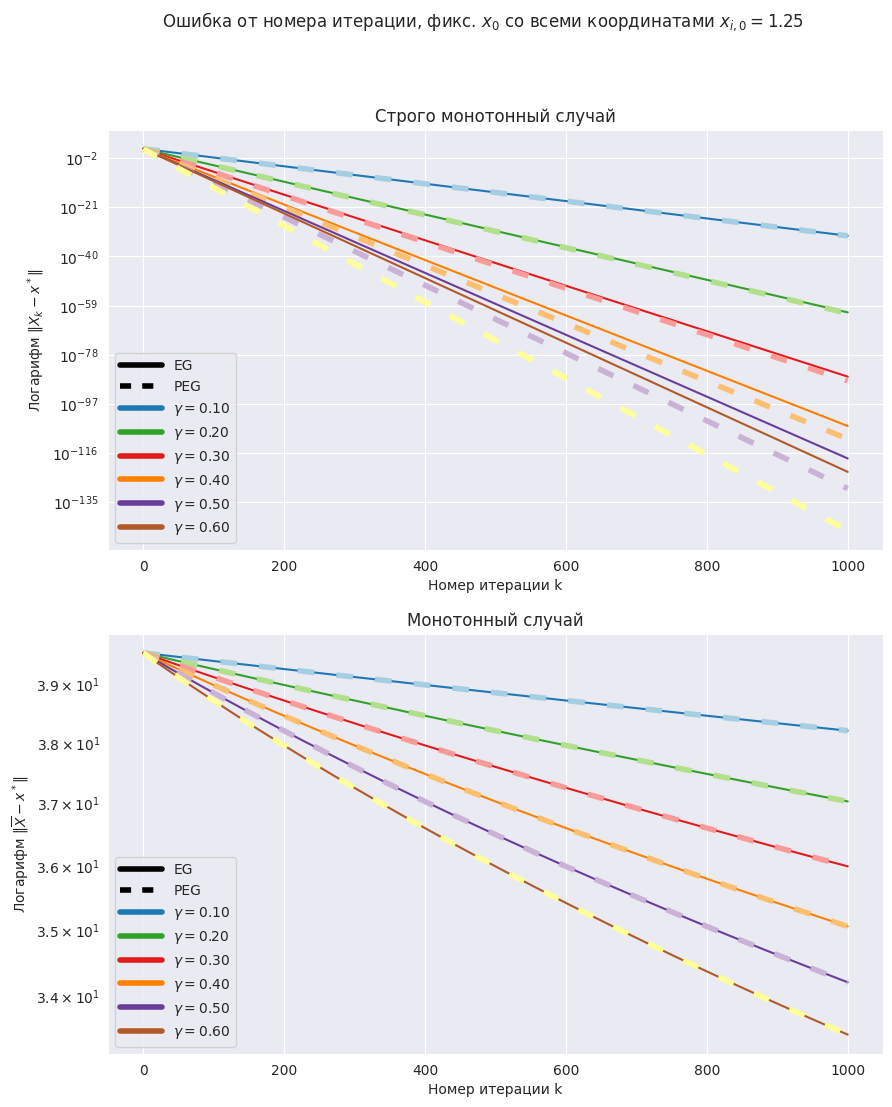

In [1186]:
with sns.axes_style('darkgrid'), sns.color_palette('Paired', n_colors=2 * gamma_steps_cnt) as pal:
    plt.figure(figsize=(10, 12))
    plt.suptitle('Ошибка от номера итерации, фикс. $x_0$ со всеми координатами $x_' + r'{i, 0}' + ' = {:.2f}$'.format(fixed_x_0_coord))
    
    legend_lines = [
        plt.Line2D([0], [0], color='k', lw=4),
        plt.Line2D([0], [0], color='k', lw=4, dashes=(2, 2))
    ]
    legend_labels = [
        'EG',
        'PEG'
    ]
    
    ns = np.arange(K + 1)
    
    for i, gamma in enumerate(gamma_steps):
        legend_lines.append(plt.Line2D([0], [0], color=pal[2 * i + 1], lw=4))
        legend_labels.append('$\\gamma = {:.2f}$'.format(gamma))
        
    for i, lbl in enumerate(coefs_labels):
        plt.subplot(2, 1, i + 1)
        plt.title(lbl)
        
        for j in range(0, gamma_steps_cnt):
            sns.lineplot(x=ns, y=eg_one_start_errors[i, j, ::2], color=pal[2 * j + 1])
            sns.lineplot(x=ns, y=peg_one_start_errors[i, j, ::2], color=pal[2 * j], dashes=(3, 4), lw=4)
    
        plt.yscale('log')
    
        plt.xlabel('Номер итерации k')
        
        if i == 1:
            plt.ylabel('Логарифм ' + r'$\|\overline{X} - x^*\|$')
        else:
            plt.ylabel('Логарифм ' + r'$\|X_k - x^*\|$')
    
        plt.legend(legend_lines, legend_labels, handlelength=3)
    plt.show()

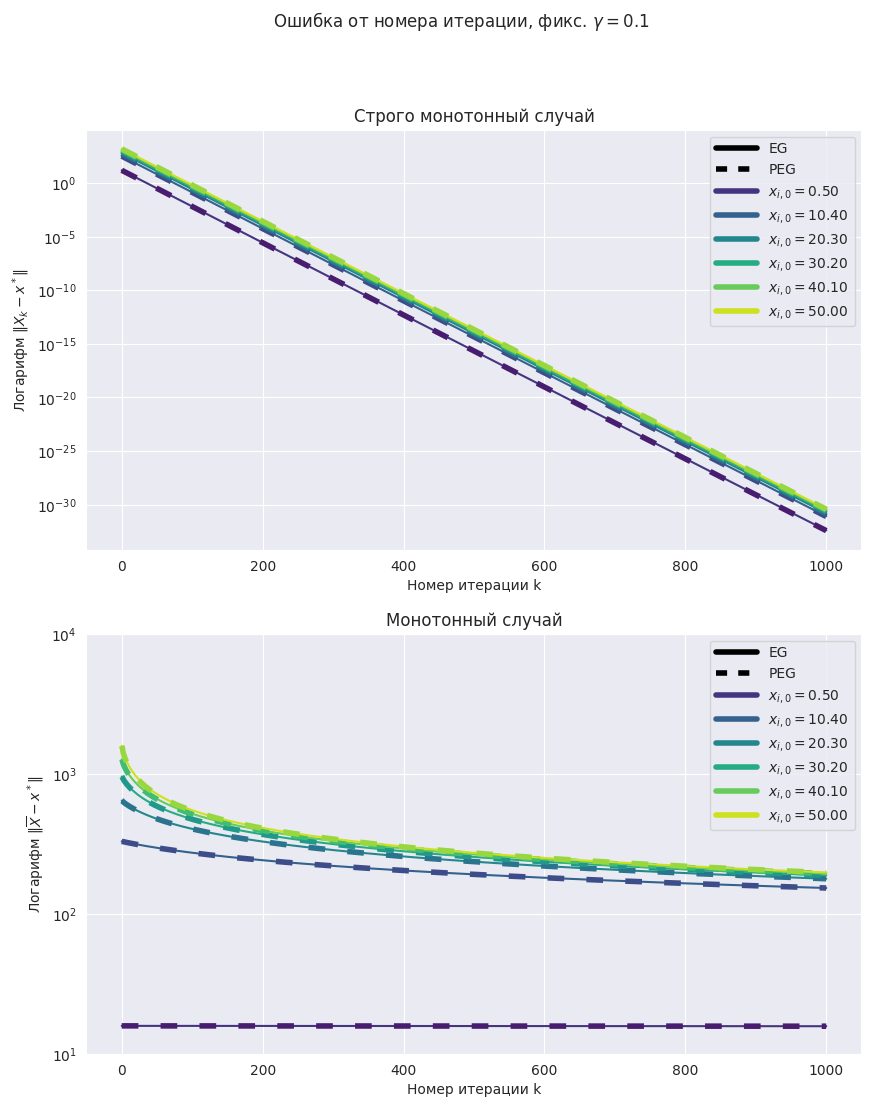

In [1187]:
with sns.axes_style('darkgrid'), sns.color_palette('viridis', n_colors=2 * x_0_cnt) as pal:
    plt.figure(figsize=(10, 12))
    plt.suptitle('Ошибка от номера итерации, фикс. $\\gamma = {}$'.format(fixed_gamma_step))
    
    legend_lines = [
        plt.Line2D([0], [0], color='k', lw=4),
        plt.Line2D([0], [0], color='k', lw=4, dashes=(2, 2))
    ]
    legend_labels = [
        'EG',
        'PEG'
    ]
    
    ns = np.arange(K + 1)
    
    for i, x_0_coord in enumerate(x_0_coords):
        legend_lines.append(plt.Line2D([0], [0], color=pal[2 * i + 1], lw=4))
        legend_labels.append(r'$x_{i, 0} = ' + '{:.2f}$'.format(x_0_coord))
        
    ylims = [(None, None), (10 ** 1, 10 ** 4)]
        
    for i, (lbl, ylim) in enumerate(zip(coefs_labels, ylims)):
        plt.subplot(2, 1, i + 1)
        plt.title(lbl)
        
        for j in range(0, x_0_cnt):
            sns.lineplot(x=ns, y=eg_one_step_errors[i, j, ::2], color=pal[2 * j + 1])
            sns.lineplot(x=ns, y=peg_one_step_errors[i, j, ::2], color=pal[2 * j], dashes=(3, 4), lw=4)
    
        plt.yscale('log')
        plt.ylim(ylim)
    
        plt.xlabel('Номер итерации k')
        
        if i == 1:
            plt.ylabel('Логарифм ' + r'$\|\overline{X} - x^*\|$')
        else:
            plt.ylabel('Логарифм ' + r'$\|X_k - x^*\|$')
    
        plt.legend(legend_lines, legend_labels, handlelength=3)
    plt.show()

**Дополнительные выводы:**
1. Сходимость в строго монотонном случае не зависит от расстояния до ответа
2. PEG не особо лучше EG с точки зрения сходимости. В нестрого монотонном случае разница вообще не наблюдается, а в строго монотонном она незначительна (порядка 10-20 итераций)
3. В нестрого монотонном случае сходимость может быть значительно медленнее (разница в 10-20 порядков точности эргодической точки к последней итерации)
4. Сходимость в монотонном случае при соблюдении ограничения на $\lambda_\max$ крайне маленькая, при этом соответствует асимптотике

## Затронутая при анализе литература

1. https://arxiv.org/abs/1908.08465
2. https://arxiv.org/abs/2006.08141